In [ ]:
!pip install torch
!pip install transformers

     |████████████████████████████████| 3.5 MB 14.6 MB/s 
     |████████████████████████████████| 67 kB 2.6 MB/s 
     |████████████████████████████████| 596 kB 37.3 MB/s 
     |████████████████████████████████| 895 kB 39.5 MB/s 
     |████████████████████████████████| 6.5 MB 38.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
## for data
import json
import pandas as pd
import numpy as np
from sklearn import metrics, manifold
## for processing
import re
import nltk
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for w2v
import gensim
import gensim.downloader as gensim_api
## for bert
import transformers

import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
nlp = gensim_api.load("glove-wiki-gigaword-300")#The gensim package has a very convenient function that returns the most similar words for any given word into the vocabulary.

In [ ]:
#jan = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-01-01_2020-01-31.tsv", sep='\t', header=0)

#feb = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByCountry_2020-02-01_2020-02-29.tsv", sep='\t', header=0)

#mar = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-03-01_2020-03-31.tsv", sep='\t', header=0)

#apr = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-04-01_2020-04-30.tsv", sep='\t', header=0)

may = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-05-01_2020-05-31.tsv", sep='\t', header=0)

jun = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-06-01_2020-06-30.tsv", sep='\t', header=0)

#jul =pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-07-01_2020-07-31.tsv", sep='\t', header=0)

#aug = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-08-01_2020-08-31.tsv", sep='\t', header=0)

#sep = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-09-01_2020-09-30.tsv", sep='\t', header=0)

#oct = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-10-01_2020-10-31.tsv", sep='\t', header=0)

#nov = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-11-01_2020-11-30.tsv", sep='\t', header=0)

#dec = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-12-01_2020-12-31.tsv", sep='\t', header=0)

#jan21= pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2021/QueriesByState_2021-01-01_2021-01-31.tsv", sep='\t', header=0)

dtf = pd.concat([may, jun], ignore_index=True)


dtf.to_csv("df.csv")
dtf.head()



,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-05-01,coronavirus uk,False,Cambridgeshire,United Kingdom,18
1,2020-05-01,coronavirus en canarias,False,Canary Islands,Spain,3
2,2020-05-01,face mask pattern free,True,Missouri,United States,4
3,2020-05-01,coronavirus latest,False,Cambridgeshire,United Kingdom,1
4,2020-05-01,face mask pattern,True,Missouri,United States,4


In [ ]:
def standardize_text(df, text_field):
      df[text_field] = df[text_field].str.replace(r"http\S+", "") #http matches literal characters \S+ matches all non-whitespace characters (the end of the url)
      df[text_field] = df[text_field].str.replace(r"http", "")#http matches literal characters
      df[text_field] = df[text_field].str.replace(r"@\S+", "") #matches all non-whitespace characters (the end of the url)
      df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ") #force the first letter to be alphabetic and the remaining characters to be 
      #alphanumeric or any of the following special characters:
      df[text_field] = df[text_field].str.replace(r"@", "at")
      df[text_field] = df[text_field].str.lower()
      df[text_field] = df[text_field].str.replace(r"[^a-zA-Z]", " ")# Search for all non-letters,  Replace all non-letters with spaces
      return df


In [ ]:
questions = standardize_text(dtf, "Query")

questions.to_csv("clean_data.csv")
questions.head()
clean_questions1= pd.read_csv("clean_data.csv")
clean_questions1.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore
1003475,1003475,2020-06-30,nzta,True,Waikato,New Zealand,1
1003476,1003476,2020-06-30,virginia coronavirus,False,Virginia,United States,46
1003477,1003477,2020-06-30,de morgen,True,Brussels Region,Belgium,26
1003478,1003478,2020-06-30,kdhe covid,False,Kansas,United States,2
1003479,1003479,2020-06-30,nationwide building society,True,Lanarkshire,United Kingdom,13


**Choose the "how" question to have a more specific nuances related to enquires that are different from pleaces (where) or methods (what)**

In [ ]:
clean_questions = clean_questions1.loc[clean_questions1.Query.str.contains("how", na=False)]
clean_questions['Query']=clean_questions['Query'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nlp.most_similar(["coronavirus"], topn=10) # get the most similar top 1o words to coronavirus

[('coronaviruses', 0.441336989402771),
 ('immunodeficiency', 0.4139547348022461),
 ('paramyxovirus', 0.3901909589767456),
 ('hiv-1', 0.38030534982681274),
 ('adenovirus', 0.3731868267059326),
 ('virus', 0.361333429813385),
 ('bacterium', 0.3576411008834839),
 ('mutated', 0.3575042486190796),
 ('malady', 0.35230788588523865),
 ('sars', 0.3522961735725403)]

**I created a function that get the the most similar top 1o words to coronavirus to the most important words founds in the data using Tfidf_vectorizer**


In [ ]:
## Function to apply
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out)) # return list as a set which is an unordered collection of unique elements,
## Create Dictionary {category:[keywords]}
dic_clusters = {}
dic_clusters["JOBS"] = get_similar_words(['stimulus','check','unemployment', 'schools', 'file'], 
                  top=30, nlp=nlp)
dic_clusters["HEALTH"] = get_similar_words(['flu','die','sanitizers','hand', 'corona']
                  , top=30, nlp=nlp)
dic_clusters["POLITICAL"] = get_similar_words(['lockdown','closed'], 
                   top=30, nlp=nlp)
## print some
#for k,v in dic_clusters.items():
 #   print(k, ": ", v[0:7], "...", len(v))

dic_clusters.items()

dict_items([('JOBS', ['programs', 'program', 'plan', 'budget', 'keep', 'jobs', 'costs', 'checks', 'government', 'require', 'must', 'provide', 'if', 'check', 'money', 'benefits', 'data', 'help', 'pay', 'file', 'spending', 'tax', 'even', 'those', 'need', 'payments', 'stimulus', 'schools', 'unemployment', 'required', 'should', 'employment', 'taxes', 'additional', 'measures']), ('HEALTH', ['deadly', 'hands', 'die', 'strain', 'outbreak', 'respiratory', 'symptoms', 'influenza', 'dying', 'h5n1', 'dead', 'pneumonia', 'cholera', 'deaths', 'sars', 'sanitizers', 'cases', 'infected', 'outbreaks', 'flu', 'corona', 'swine', 'come', 'hand', 'infection', 'could', 'virus', 'disease', 'chickens', 'epidemic', 'treat', 'infections', 'fingers', 'bird', 'h1n1']), ('POLITICAL', ['reopening', 'lifted', 'temporarily', 'close', 'day', 'reopen', 'closure', 'monday', 'lockdown', 'halted', 'curfew', 'locked', 'after', 'reopened', 'shutdown', 'thursday', 'midday', 'sealed', 'open', 'precaution', 'shut', 'closed', '

In [ ]:
 ## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]
        
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca') #Principal Component Analysis (PCA) is a linear dimensionality reduction technique for extracting information from 
#a high-dimensional space by projecting it into a lower-dimensional sub-space.
X = pca.fit_transform(X)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


array([[ 8.100802  , -7.266762  ],
       [ 8.097875  , -7.2452526 ],
       [ 5.0658674 , -6.8455024 ],
       [ 4.773064  , -8.821496  ],
       [ 5.2295356 , -5.568136  ],
       [ 7.615343  , -8.539742  ],
       [ 6.1461897 , -8.167426  ],
       [ 7.3996234 , -5.6024895 ],
       [ 4.658882  , -6.403742  ],
       [ 6.6494217 , -6.2804894 ],
       [ 5.9195843 , -5.715265  ],
       [ 6.473149  , -6.5987315 ],
       [ 5.647887  , -5.2660327 ],
       [ 7.1700253 , -5.566574  ],
       [ 5.802705  , -7.236906  ],
       [ 6.975573  , -8.151012  ],
       [ 8.234128  , -6.242857  ],
       [ 5.684226  , -6.2024903 ],
       [ 6.23084   , -7.699856  ],
       [ 8.200084  , -5.4801307 ],
       [ 4.984854  , -8.567656  ],
       [ 5.8428335 , -9.2438135 ],
       [ 5.4408646 , -5.045415  ],
       [ 6.0462074 , -4.9720893 ],
       [ 5.969482  , -5.9079423 ],
       [ 6.4278207 , -8.010836  ],
       [ 4.5938454 , -8.24852   ],
       [ 3.8241448 , -7.218911  ],
       [ 7.6577463 ,

In [ ]:

## create dtf
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


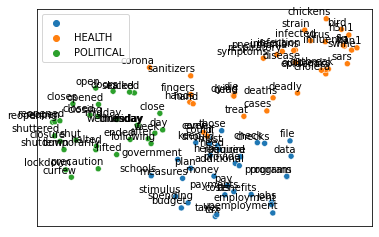

In [ ]:
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]
        
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)

        
## plot
fig, ax = plt.subplots()
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)

ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', # displays the texts
               ha='right', va='bottom')
    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# I use corpus I preprocessed and the target clusters created in the same vector space - using BERT WHICH looks at the entire sentence and then assigns an embedding to each word





In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


**I use BERT Word Embedding to represent each text with an array (shape: number of tokens x 768) and then summarize each search result into a mean vector.**


In [ ]:
## function to apply
def utils_bert_embedding(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt) #Returns a dictionary containing the encoded sequence or sequence pair
    idx = np.array(idx)[None,:]  # creating an array which is a fixed-size container of items of the same type and size, and asks NumPy to add a new dimension of size 1 for the associated axis.
    embedding = nlp(idx)
    X = np.array(embedding[0][0][1:-1])  # returns string of length one and character one 
    return X
## create list of search vector
lst_mean_vecs = [utils_bert_embedding(txt, tokenizer, nlp).mean(0) 
                 for txt in clean_questions1["Query"]]
## create the feature matrix (n news x 768)
X = np.array(lst_mean_vecs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: ignored

**I have to rescale the scores in each row so that they sum to 1 and decide a category to label. I have to choose the one with the highest score, set minimum thresholds and leave out predictions with really low scores.**

In [ ]:
#--- Model Algorithm ---#
## compute cosine similarities
similarities = np.array(
            [metrics.pairwise.cosine_similarity(X, y).T.tolist()[0] 
             for y in dic_y.values()]
            ).T
## adjust and rescale
labels = list(dic_y.keys())
for i in range(len(similarities)):
    ### assign randomly if there is no similarity
    if sum(similarities[i]) == 0:
       similarities[i] = [0]*len(labels)
       similarities[i][np.random.choice(range(len(labels)))] = 1
    ### rescale so they sum = 1
    similarities[i] = similarities[i] / sum(similarities[i])

## classify the label with highest similarity score
predicted_prob = similarities
predicted = [labels[np.argmax(pred)] for pred in predicted_prob]

In [ ]:
y_test = dtf["y"].values
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    